# Correlación variables categóricas

# $\chi^2 = \sum_{i,j} \frac{(n_{ij} - \frac{n_{i.}n_{.j}}{n})^2}{\frac{n_{i.}n_{j.}}{n}}$

# $V = \sqrt{\frac{\chi^2}{n (min(k-1,r-1))}} $

In [2]:
#v es 1 o 0 siendo 1 estrechamente correlacionado
import pandas as pd


In [2]:
data = pd.read_csv('train.csv')

In [5]:
data['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [6]:
data['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [14]:
#La tabla cruzada va a ser a matriz ij que vamos a meter en las fórmulas
crosstab = pd.crosstab(data['ExterQual'], data['LandContour'])
crosstab


LandContour,Bnk,HLS,Low,Lvl
ExterQual,,,,
Ex,2,5,0,45
Fa,5,1,3,5
Gd,3,19,12,454
TA,53,25,21,807


In [10]:
import scipy.stats as stats

Calcular la $\chi^2$

In [18]:
X2 = stats.chi2_contingency(crosstab, correction=False)[0]
X2

87.33626641994562

In [31]:
N = crosstab.sum().sum()

In [26]:
k = data['ExterQual'].nunique()
r = data['LandContour'].nunique()

In [34]:
import numpy as np
V = np.sqrt((X2/N)/min(k-1,r-1))
V

0.1412083101445126

# Ejercicio 2 unir tablas 

In [33]:
data = pd.read_csv('movies_metadata.csv')

C:\Users\USA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [32]:
credits = pd.read_csv('credits.csv')
keywords = pd.read_csv('keywords.csv')

¿Cómo cruzar dos tablas?

In [34]:
#Con esto tengo que forzar el tipo de dato para poder cruzar las tablas
credits['id'] = credits['id'].astype(str)
data['id'] = data['id'].astype(str)
keywords['id'] = keywords['id'].astype(str)

In [35]:
data = data.merge(credits, on='id', how='left')
data = data.merge(keywords, on='id', how='left')

In [36]:
data['crew'].iloc[0]

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

In [37]:
#Para corregir lo anterior se usa literal_eval
from ast import literal_eval
literal_eval(data['crew'].iloc[0])

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f55',
  'department': 'Writing',
  'gender': 2,
  'id': 7,
  'job': 'Screenplay',
  'name': 'Andrew Stanton',
  'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f5b',
  'department': 'Writing',
  'gender': 2,
  'id': 12892,
  'job': 'Screenplay',
  'name': 'Joel Cohen',
  'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f61',
  'department': 'Writing',
  'gender': 0,
  'id': 12893,
  'job': 'Screenplay',
  'name': 'Alec Sokolow',
  'profile_path': '/v79vlRYi94BZUQnkkyzn

In [38]:
data = data[data['crew'].notna()]

In [39]:
data['crew'] = data['crew'].apply(literal_eval)

Haciendo uso de comprehension lists ej:
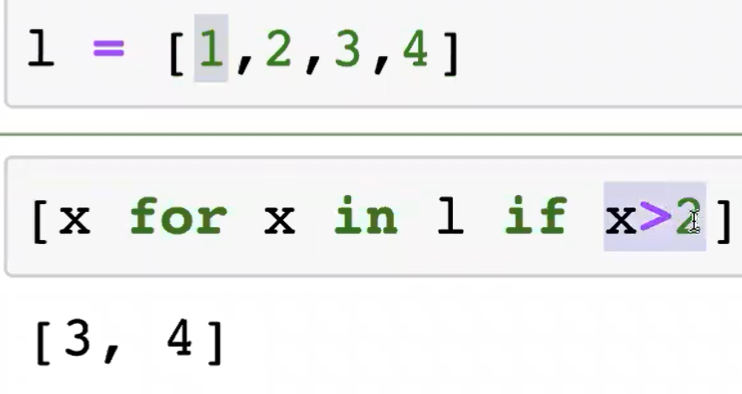
Si a x le agrego una condición:
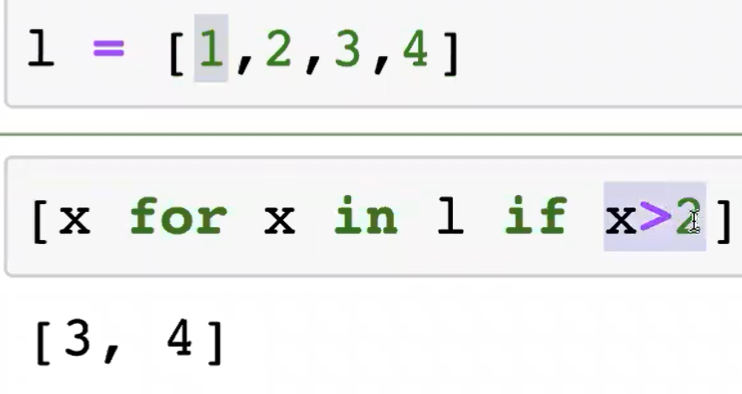
Se pueden agregar condicionales:
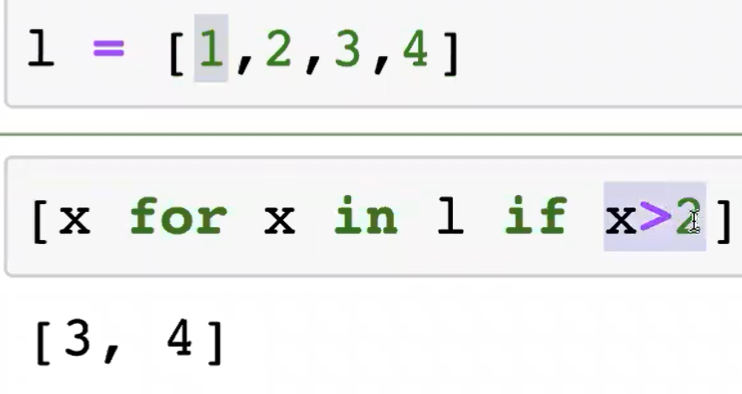

In [40]:
def get_director(row):
    try:
        return [x['name'] for x in row if x['job'] == 'Director'][0]
    except:
        return None

In [41]:
data['Director'] = data['crew'].apply(get_director)

In [42]:
data['genres'] = data['genres'].apply(literal_eval)

In [137]:
row = data['genres'].iloc[0]

In [144]:
def get_genres(row):
    return str([x['name'] for x in row])[1:-1]

In [145]:
get_genres(row)

"'Animation', 'Comedy', 'Family'"

In [146]:
data['genres_names'] = data['genres'].apply(get_genres)

/var/folders/0w/mrbh4crs0759mt0vz8vy2lth0000gn/T/ipykernel_40828/1523963825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genres_names'] = data['genres'].apply(get_genres)


In [150]:
data['genres_names'].str.get_dummies(',')

,'Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','Foreign',...,'History','Horror','Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western'
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46627,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
46628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46629,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
